In [118]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np 

from PIL import Image

In [119]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train.shape

(60000, 28, 28)

In [120]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

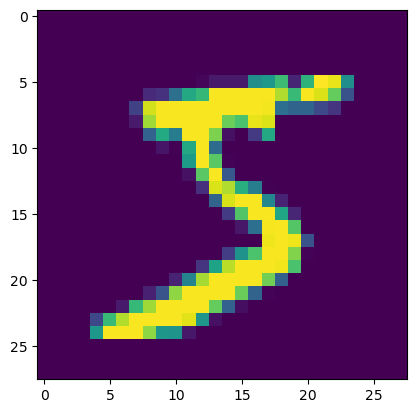

In [121]:
plt.imshow(X_train[0])

In [122]:
y_train[0]

5

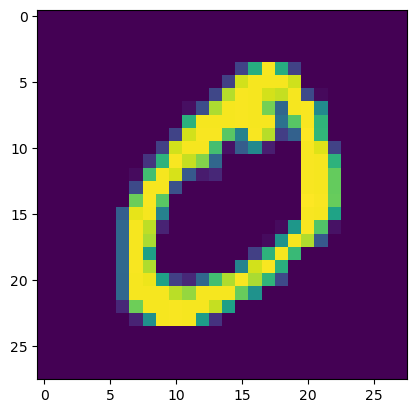

In [123]:
plt.imshow(X_train[1])

In [124]:
y_train[1]

0

In [125]:
unique_values = list(set(y_train))
print(unique_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [126]:
classes = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [127]:
# a function that prints the picture as well as its y_train value

def plot_sample(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [128]:
# im just trying to find the pixel value of the images: 

image_dimensions = X_train.shape[1:]
print(f"MNIST Image Dimensions: {image_dimensions}")

MNIST Image Dimensions: (28, 28)


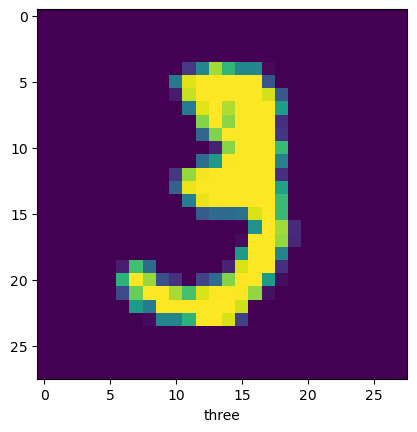

In [129]:
plot_sample(X_train, y_train, 10)

In [130]:
# just trying to find the smallest and largest pixel value of these images: 

max_value = np.max(X_train)
min_value = np.min(X_train)

print(f"Largest Value: {max_value}")
print(f"Smallest Value: {min_value}")

Largest Value: 255
Smallest Value: 0


In [131]:
# this means I have to divide by 255 

In [132]:
# normalising our data

X_train = X_train / 255
X_test = X_test / 255

In [133]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [134]:
# need to flatten our data here as our models expect 1 dimensional arrays

# we are doing the 28 * 28 because we want the model to pick up the first image is the first 784 items 
# in the 1 dimensional array

# X_train_flattened = X_train.reshape(len(X_train), 28*28)
# X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [135]:
# ORRRRRR

In [139]:
ann = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.6612 - accuracy: 0.8275
Epoch 2/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.3352 - accuracy: 0.9068
Epoch 3/10
1875/1875 [==============================] - 2s 861us/step - loss: 0.2876 - accuracy: 0.9191
Epoch 4/10
1875/1875 [==============================] - 2s 859us/step - loss: 0.2588 - accuracy: 0.9275
Epoch 5/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.2362 - accuracy: 0.9332
Epoch 6/10
1875/1875 [==============================] - 2s 832us/step - loss: 0.2180 - accuracy: 0.9387
Epoch 7/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.2022 - accuracy: 0.9437
Epoch 8/10
1875/1875 [==============================] - 2s 836us/step - loss: 0.1886 - accuracy: 0.9468
Epoch 9/10
1875/1875 [==============================] - 2s 834us/step - loss: 0.1769 - accuracy: 0.9500
Epoch 10/10
1875/1875 [==============================] - 2s 825u

In [145]:
ann = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2776 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1251 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0875 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0654 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0520 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0415 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0339 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0232 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [109]:
# looks like in this case the adam optimizer was better

# so we will stick with that

In [141]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 0s 748us/step - loss: 0.0806 - accuracy: 0.9753


[0.08055659383535385, 0.9753000140190125]

In [111]:
# 98% accuracy with this model

# not baaaaad 

In [142]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 0s 644us/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.95      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# these are different ways to consider building a better model / specific prediction values, ie here the number 8 

# Data Augmentation:
# Augment your training dataset by applying transformations to the images, such as rotations, flips, and zooms. 
# This helps the model generalize better to variations in the data.

# Balancing the Dataset:
# Ensure that your dataset is balanced, meaning it contains a roughly equal number of examples for each class. 
# If the dataset is imbalanced, the model may not learn the characteristics of the minority class well.

# Feature Engineering:
# Explore additional features that could help improve predictions for the specific class. For image data, 
# this might involve extracting additional features or using more advanced image preprocessing techniques.

# Fine-Tuning the Model:
# Experiment with hyperparameter tuning, such as adjusting the learning rate, batch size, or model architecture. 
# You can also try different optimization algorithms.

# Transfer Learning:
# Utilize transfer learning by leveraging pre-trained models on larger datasets. Fine-tune a pre-trained model on your 
# specific dataset, which may improve performance for all classes, including the problematic one.

# Ensemble Methods:
# Train multiple models and combine their predictions using ensemble methods. This can improve overall performance and 
# help mitigate weaknesses in individual models.

# Class-Specific Analysis:
# Analyze misclassified examples for the specific class (e.g., number 8) to understand common patterns of failure. 
# This can guide adjustments in preprocessing or model architecture.

# Regularization Techniques:
# Apply regularization techniques, such as dropout or weight regularization, to prevent overfitting and improve the model's 
# ability to generalize to unseen data.

# Confusion Matrix Analysis:
# Examine the confusion matrix to identify patterns of misclassifications, providing insights into areas for improvement.

# Collect More Data:
# If possible, consider collecting more labeled data for the specific class to improve the model's understanding of its 
# characteristics.

In [113]:
# now lets build a CNN and see if we can do better! 

In [148]:
cnn = keras.Sequential([
    
    layers.Conv2D(filters = 30, kernel_size =(3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((1,1)),
    
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0068 - accuracy: 0.9978
Epoch 2/5
1875/1875 [==============================] - 2s 999us/step - loss: 0.0049 - accuracy: 0.9985
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0065 - accuracy: 0.9980
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0043 - accuracy: 0.9987


In [149]:
# just want to play around with changing the features, see what happens

In [150]:
cnn = keras.Sequential([
    
    layers.Conv2D(filters = 30, kernel_size =(3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0045 - accuracy: 0.9984
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0043 - accuracy: 0.9986
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0038 - accuracy: 0.9988
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0048 - accuracy: 0.9986


In [151]:
cnn = keras.Sequential([
    
    layers.Conv2D(filters = 30, kernel_size =(3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((4,4)),
    
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0046 - accuracy: 0.9985
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0026 - accuracy: 0.9991
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0027 - accuracy: 0.9991


In [152]:
# looks like the higher pooling actually helped here - probably because with hand written digits there isnt a lot of fine detail

# so having more pooling probably helps here

In [153]:
# lets see the difference with a softmax

In [155]:
cnn = keras.Sequential([
    
    layers.Conv2D(filters = 30, kernel_size =(3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((4,4)),
    
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0044 - accuracy: 0.9986
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0048 - accuracy: 0.9983
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0047 - accuracy: 0.9985


In [156]:
# interesting, maybe the softmax function helps here too, because of the simplicity of the image data